<h1 align="center">Solutions to Problem Set 1</h1> 
<h2 align="center">Shashank Sule</h2> 

### Problem 1



a) Note that since $\sum_{n=1}^{\infty}1/n^4$ a sum of positive and decreasing terms, $S_N \leq S$ and from the inequality proved in class, 
$$\sum_{n=N+1}^{\infty}1/n^4 \leq \int_{N}^{\infty}1/x^4 \, dx = \frac{1}{3N^3}$$. Consequently, we get that 

$$ \varepsilon_N = \frac{|S_N - S|}{S} \leq \frac{|S_N - S|}{S_N} = \frac{\sum_{n=N+1}^{\infty}1/n^4}{S_N} \leq \frac{\int_{N}^{\infty}1/x^4\,dx}{\int_{1}^{N}1/x^4\,dx} = \frac{\frac{1}{3N^3}}{\frac{1}{3N^3} - \frac{1}{3}} < 10^{-9}$$ 

Solving for $N$, we get that $N \geq 10^3$. 

In [1]:
function quartic_sum(N)
    s = 0.0
    
    for i in 1:N
        s =s+ 1/i^4
    end
    
    return s 
end

quartic_sum (generic function with 1 method)

In [2]:
Err = [-(quartic_sum(10^i)-((pi^4)/90))/((pi^4)/90) for i in 1:4];

┌ Info: Recompiling stale cache file /Users/shashanksule/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


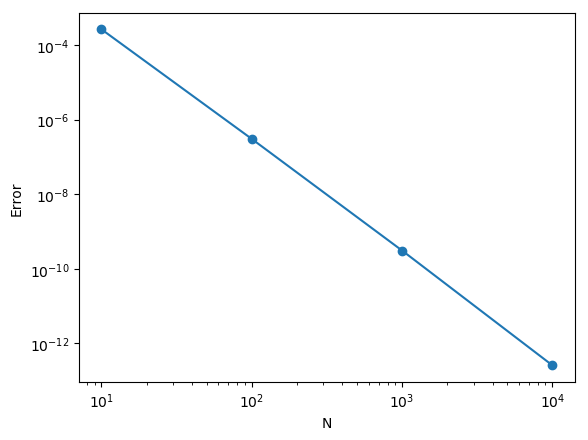

In [3]:
using PyPlot
loglog([10^i for i in 1:4], Err, "o-")
xlabel("N");
ylabel("Error");

### Problem 2

In [4]:
function P_N(N)
summand = pi/N
S = 0.0
for i=1:N
S += summand
end
return S
end

P_N (generic function with 1 method)

a) I expect $E_N$ to increase with $N$. Although analytically $P_N = \pi$ for every $N$, the computer rounds up the expression $\frac{\pi}{N}$ and then sums the $N$ terms up. Consequently, the rounding errors get added up so the error increases as the number of additions increases. 

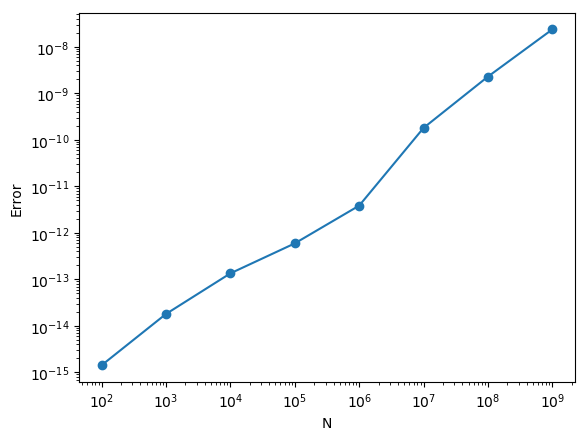

In [5]:
Err = [abs(P_N(10^i)-pi)/pi for i in 2:9];
loglog([10^i for i in 2:9], Err, "o-")
xlabel("N");
ylabel("Error");


Indeed! Up to a hundred terms, the error is actually as close as machine accuracy to $\pi$. However, as we add more and more similar terms up we accumulate more rounding errors. By the time we go up to a billion terms, we only approximate $\pi$ up to 8 digits. 

### Problem 3

a) Let $ \frac{b-a}{2} = h$. We use the substitution $$ u = \frac{x -(a + h)}{h}$$ In this case, when $x=a$, $u=-1$ and when $x=b$, $u=1$. Furthermore, using the substitution rule we get that,

$$ \int_{a}^{b}f(x) \, dx = \int_{-1}^{1}f(x(u))h\,du = h\int_{-1}^{1}f(hu + (a+h))\,du$$

Here, let $g(u) = f(hu + (a+h))$. Then 

$$ h\int_{-1}^{1}g(u)\,du \approx h\sum_{n=1}^{N}w_ng(x_n) = \sum_{n=1}^{N}hw_nf(hx_n + (a+h))$$ Thus, the new quadrature rule in terms of the old quadrature rule is $w_{n}' = hw_n$ and $x_{n}' = hx_n + (a+h)$ 

b) To find the second order interpolation $cx^2 + bx + a$ of $f$ on $[-1,1]$, we need to find $a,b,c$ s.t. 

$$     c - b + a = f(-1) $$
 $$           a = f(0) $$
   $$ c + b + a = f(1) \\ $$


The solutions are 

$$ a = f(0), \, b = \frac{f(1) - f(-1)}{2}, \, c = \frac{1}{2}\Big(f(1) + f(-1) - 2f(0)\Big) $$

Now we compute the integral! 

$$ \int_{-1}^{1} cx^2 + bx + a \, dx = \Big[ \frac{cx^3}{3} + \frac{bx^2}{2} + ax \Big]^{1}_{-1} = \frac{2c}{3} + 2a = \frac{1}{3}\Big(f(-1) + 4f(0) + f(1)\Big)$$

Thus, Simpson's rule on $[-1,1]$ yields 

$$ \int_{-1}^{1}f(x) \, dx \approx \int_{-1}^{1} cx^2 + bx + a \, dx = \frac{1}{3}\Big(f(-1) + 4f(0) + f(1)\Big) $$

c) Using the formula from part (a), we see that $$ \int_{a}^{b}f(x) \, dx = h\int_{-1}^{1}g(u)\,du \approx \frac{h}{3}\Big(g(-1) + 4g(0) + g(1)\Big) = \frac{h}{3}\Bigg(f(a) + 4f\Big(\frac{b+a}{2}\Big) + f(b)\Bigg)$$ 

d) Suppose we divide $[u,v]$ into $N$ subintervals $[x_n, x_n + \Delta]$ where $\Delta = \frac{v-u}{N}$, $x_0 = u, x_N = v,$ and $x_{n+1} = x_{n} + \Delta$. First of all, 

$$ \int_{x_n}^{x_n + \Delta}f(x) \, dx = \frac{\frac{x_n + \Delta - x_n}{2}}{3}\Bigg(f(x_n) + 4f\Big(x_n + \frac{\Delta}{2}\Big) + f(x_n + \Delta)\Bigg)$$

Thus, 

$$ \int_{x_n}^{x_{n+1}} f(x) \, dx = \frac{\Delta}{6}\Bigg(f(x_n) + 4f\Big(x_n + \frac{\Delta}{2}\Big) + f(x_{n+1})\Bigg)$$

Finally, to make the composite Simpson's rule, we add all the terms up from 0 to $N$

$$ \int_{u}^{v} f(x) \, dx = \sum_{n=0}^{N}\frac{\Delta}{6}\Bigg(f(x_n) + 4f\Big(x_n + \frac{\Delta}{2}\Big) + f(x_{n+1})\Bigg)$$

From the summation formula, it is clear that we need to evaluate $N+1$ interval ends, and $N$ midpoints of each interval. Thus, Simpson's rule requires $2N + 1$ evaluations. 

### Problem 4

In [8]:
function rectangular_rule(f, a, b, N)
    Δ = (b - a)/N
    
    I = 0.0
    for n=0:N-1
        I += Δ*f(a + n*Δ)
    end
    
    return I
end

rectangular_rule (generic function with 1 method)

In [9]:
function trapezoid_rule(f, a, b, N)
    Δ = (b - a)/N
    
    I = 0.5*Δ*f(a) + 0.5*Δ*f(b)
    for n=1:N-1
        I += Δ*f(a + n*Δ)
    end
    
    return I
end

trapezoid_rule (generic function with 1 method)

In [11]:
function simpson_rule(f, a, b, N)
    Δ = (b - a)/N
    h = Δ/2
    
    I = h*f(a)/3 + h*f(b)/3
    for n=1:N-1
        I += h*( 2*f(a + 2*n*h) + 4*f(a+ (2*n-1)*h))/3
    end
    I += 4*h*f(a+ (2*N-1)*h)/3
    
    return I
end

simpson_rule (generic function with 1 method)

In [12]:
f(x)=exp( cos( (x+1)^2 + 2sin(4x + 1) ) )
rect1 = [rectangular_rule(f, 0, pi, 10^N) 
        for N in 1:7];
trap1 = [trapezoid_rule(f, 0, pi, 10^N) 
        for N in 1:7];
simp1 = [simpson_rule(f, 0, pi, 10^N) 
        for N in 1:7];

In [13]:
errect1 = abs.(rect1 .- 2.5193079820307612557)./2.5193079820307612557;
errtrap1 = abs.(trap1 .- 2.5193079820307612557)./2.5193079820307612557;
errsimp1 = abs.(simp1 .- 2.5193079820307612557)./2.5193079820307612557;

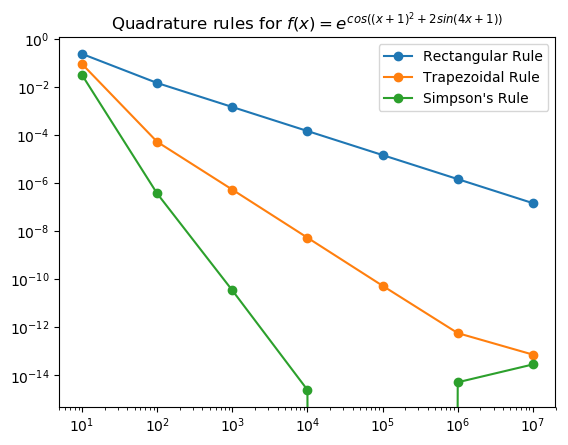

In [37]:
loglog([10^i for i in 1:7], errect1, "o-", label="Rectangular Rule")
loglog([10^i for i in 1:7], errtrap1, "o-", label="Trapezoidal Rule")
loglog([10^i for i in 1:7], errsimp1, "o-", label="Simpson's Rule")
legend()
title("Quadrature rules for \$f(x) = e^{cos((x+1)^2 + 2sin(4x+1))}\$");

In [26]:
g(x)=exp( cos( (cos(x+1))^2 + 2sin(4x + 1)))
rect2 = [rectangular_rule(g, 0, pi, 5^N) 
        for N in 1:10];
trap2 = [trapezoid_rule(g, 0, pi, 5^N) 
        for N in 1:10];
simp2 = [simpson_rule(g, 0, pi, 5^N) 
        for N in 1:10];
errect2 = abs.(rect2 .- 4.4889560612699568830)./4.4889560612699568830;
errtrap2 = abs.(trap2 .- 4.4889560612699568830)./4.4889560612699568830;
errsimp2 = abs.(simp2 .- 4.4889560612699568830)./4.4889560612699568830;

In [23]:
errtrap2

10-element Array{Float64,1}:
 0.047227870099609805  
 7.082789575243764e-7  
 3.957171367138993e-16 
 7.914342734277986e-16 
 3.363595662068144e-15 
 1.9785856835694963e-15
 6.529332755779338e-15 
 1.0090786986204432e-14
 6.113829762229745e-14 
 2.809591670668685e-14 

In [27]:
errect2

10-element Array{Float64,1}:
 0.047227870099609805  
 7.082789575243764e-7  
 3.957171367138993e-16 
 7.914342734277986e-16 
 3.363595662068144e-15 
 1.9785856835694963e-15
 6.529332755779338e-15 
 1.0090786986204432e-14
 6.113829762229745e-14 
 2.809591670668685e-14 

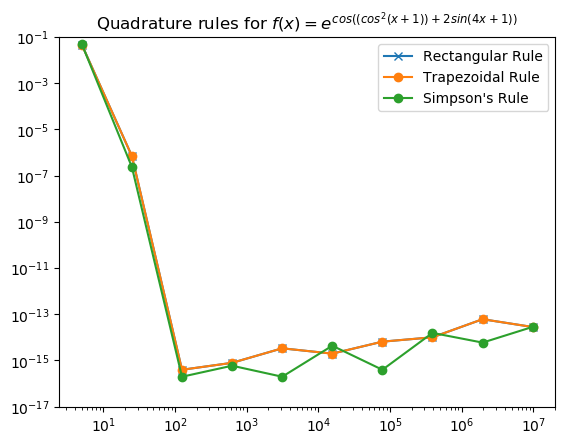

In [29]:
loglog([5^i for i in 1:10], errect2, "x-", label="Rectangular Rule")
loglog([5^i for i in 1:10], errtrap2, "o-", label="Trapezoidal Rule");
loglog([5^i for i in 1:10], errsimp2, "o-", label="Simpson's Rule");
ylim(10^-17, 10^-1)
legend()
title("Quadrature rules for \$f(x) = e^{cos((cos^2(x+1)) + 2sin(4x+1))}\$");

I used step size $5^N$ as the rules kept reaching machine accuracy very quickly. Furthermore, the rectangular rule doesn't appear as the errors match with those in the trapezoidal rule (See the cell below). I think the given correct answer had too many specified digits. 

In [31]:
[errect2,errtrap2]

2-element Array{Array{Float64,1},1}:
 [0.0472279, 7.08279e-7, 3.95717e-16, 7.91434e-16, 3.3636e-15, 1.97859e-15, 6.52933e-15, 1.00908e-14, 6.11383e-14, 2.80959e-14]
 [0.0472279, 7.08279e-7, 3.95717e-16, 7.91434e-16, 3.3636e-15, 1.97859e-15, 6.52933e-15, 1.00908e-14, 6.11383e-14, 2.80959e-14]

c) Here we need to split the integral over the two intervals $[0,\pi]$ and $[\pi, 2\pi]$ to take care of the absolute value signs, i.e

$$ \int_{0}^{2\pi} \frac{\tanh(x)}{\sqrt{|x-\pi|}}\,dx = \int_{0}^{\pi} \frac{\tanh(x)}{\sqrt{\pi-x}}\,dx + \int_{\pi}^{2\pi} \frac{\tanh(x)}{\sqrt{x - \pi}}\,dx$$

Now to take away the singularity at $\pi$ in the first integral, I use the substitution $u = \sqrt{\pi-x}$. Then at $x = 0$, $u = \sqrt{\pi}$ and at $x = \pi$, $u = 0$. Furthermore, $-2du = \frac{1}{\sqrt{\pi - x}}dx$ so 

$$ \int_{0}^{\pi} \frac{\tanh(x)}{\sqrt{\pi-x}}\,dx = -2\int_{\sqrt{\pi}}^{0}\tanh(\pi - u^2)\, du = \int^{\sqrt{\pi}}_{0}2\tanh(\pi - u^2)\, du $$ 

Using a similar substitution for the second integral we obtain that 

$$ \int_{\pi}^{2\pi} \frac{\tanh(x)}{\sqrt{x-\pi}}\,dx =  \int^{\sqrt{\pi}}_{0}2\tanh(\pi + u^2)\, du $$ 

In [96]:
d1(x) = 2*tanh(pi - x^2);
d2(x) = 2*tanh(pi + x^2);
rect3 = [rectangular_rule(d1, 0, sqrt(pi), 10^N) 
        for N in 1:7] .+ [rectangular_rule(d2, 0, sqrt(pi), 10^N) 
        for N in 1:7];
trap3 = [trapezoid_rule(d1, 0, sqrt(pi), 10^N) 
        for N in 1:7] .+ [trapezoid_rule(d2, 0, sqrt(pi), 10^N) 
        for N in 1:7];
simp3 = [simpson_rule(d1, 0, sqrt(pi), 10^N) 
        for N in 1:7] .+ [simpson_rule(d2, 0, sqrt(pi), 10^N) 
        for N in 1:7];
errect3 = abs.(rect3 .- 6.6388149923287733132)./6.6388149923287733132;
errtrap3 = abs.(trap3 .- 6.6388149923287733132)./6.6388149923287733132;
errsimp3 = abs.(simp3 .- 6.6388149923287733132)./6.6388149923287733132;

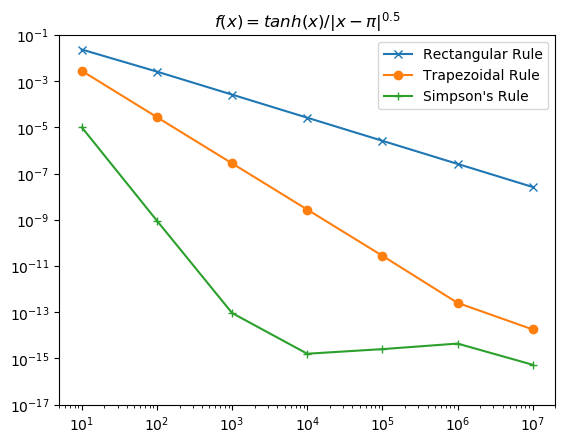

In [102]:
loglog([10^i for i in 1:7], errect3, "x-", label="Rectangular Rule")
loglog([10^i for i in 1:7], errtrap3, "o-", label="Trapezoidal Rule")
loglog([10^i for i in 1:7], errsimp3, "+-", label="Simpson's Rule")
ylim(10^-17, 10^-1)
legend()
title(L"f(x) = tanh(x)/|x-\pi|^{0.5}");

d) Here I use the substitution $x = \frac{u}{1-u}$ to convert the improper integral to a proper one: 

$$ \int_{0}^{\infty}\frac{\arctan(\pi x) - \arctan(x)}{x} \, dx = \int_{0}^{1}\frac{\arctan(\pi \frac{u}{1-u}) - \arctan(\frac{u}{1-u})}{u}\frac{(1-u)}{(1-u)^2} \, du$$

$$ = \int_{0}^{1}\frac{\arctan(\pi \frac{u}{1-u}) - \arctan(\frac{u}{1-u})}{u(1-u)} \, du = \int_{0}^{1}\frac{\arctan(\pi \frac{u}{1-u})}{u(1-u)} \, du - \int_{0}^{1}\frac{\arctan(\frac{u}{1-u})}{u(1-u)} \, du$$

Now using a partial fraction decomposition on each integral we are able to express the original integral as 

$$\int_{0}^{1}\frac{\arctan(\pi \frac{u}{1-u})}{u} \, du + \int_{0}^{1}\frac{\arctan(\pi \frac{u}{1-u})}{1-u} \, du - \int_{0}^{1}\frac{\arctan(\frac{u}{1-u})}{u} \, dx -
\int_{0}^{1}\frac{\arctan(\frac{u}{1-u})}{1-u} \, du$$

At this point we cannot do much else other than use an epsilon expansion to calculate these integrals. 

In [57]:
using PyPlot
ϵ=0.0
b1(x) = atan(pi*(x/(1-x)))/(x+ϵ);
b2(x) = atan(pi*(x/(1-x)))/(1-x+ϵ);
b3(x) = atan((x/(1-x)))/(x+ϵ);
b4(x) = atan((x/(1-x)))/(1-x+ϵ);
recteps4 = zeros(13,7);
for i in 1:13
    ϵ = 10.0^(-i);
    for j in 1:7
    recteps4[i,j] = rectangular_rule(b1,0,1,10^j);
    end
end

rectepserr4 = zeros(12,7);
for i in 1:12
    rectepserr4[i] = recteps4[i+1] .- recteps4[i]
end



In [59]:
recteps4

13×7 Array{Float64,2}:
 1.75153  1.84086  1.84755  1.8482   1.84826  1.84827  1.84827
 2.22325  2.39157  2.40098  2.40171  2.40178  2.40178  2.40179
 2.29394  2.50264  2.51929  2.52024  2.52031  2.52032  2.52032
 2.30142  2.51638  2.53694  2.53861  2.5387   2.53871  2.53871
 2.30217  2.5178   2.53897  2.54102  2.54119  2.5412   2.5412 
 2.30224  2.51794  2.53918  2.54129  2.5415   2.54151  2.54151
 2.30225  2.51796  2.5392   2.54132  2.54153  2.54155  2.54155
 2.30225  2.51796  2.5392   2.54132  2.54153  2.54155  2.54156
 2.30225  2.51796  2.5392   2.54132  2.54153  2.54156  2.54156
 2.30225  2.51796  2.5392   2.54132  2.54153  2.54156  2.54156
 2.30225  2.51796  2.5392   2.54132  2.54153  2.54156  2.54156
 2.30225  2.51796  2.5392   2.54132  2.54153  2.54156  2.54156
 2.30225  2.51796  2.5392   2.54132  2.54153  2.54156  2.54156

Here the rows represent log decrements in $\epsilon$ and the columns represent the number of steps in the rule. If we plot the difference between successive decrements in epsilon we see that the error decreases log linearly with a unit log linear decrement in epsilon: 

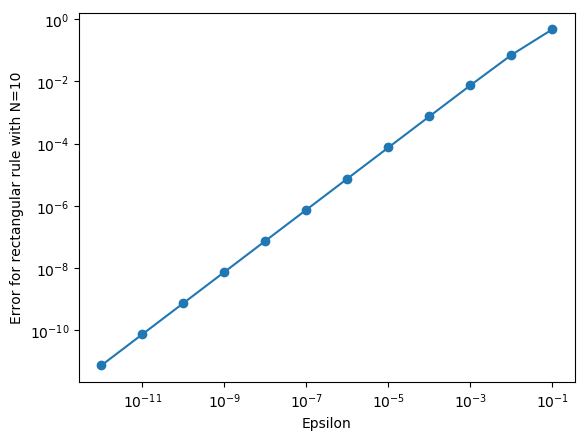

In [67]:
loglog([10.0^(-i) for i in 1:12], rectepserr4[1:12,1], "o-")
xlabel("Epsilon");
ylabel("Disparity in integral evaluations for rectangular rule with N=10");

So to keep at machine accuracy, let's keep $\epsilon = 10^{-14}$.

In [91]:
ϵ = (10.0)^(-14)
rect4 = [rectangular_rule(b1, 0, 1, 10^N) 
        for N in 1:7] .+ [rectangular_rule(b2, 0, 1, 10^N) 
        for N in 1:7] .- [rectangular_rule(b3, 0, 1, 10^N) 
        for N in 1:7] .- [rectangular_rule(b4, 0, 1, 10^N) 
        for N in 1:7];

trap4 = [trapezoid_rule(b1, 0, 1, 10^N) 
        for N in 1:7] .+ [trapezoid_rule(b2, 0, 1, 10^N) 
        for N in 1:7] .- [trapezoid_rule(b3, 0, 1, 10^N) 
        for N in 1:7] .- [trapezoid_rule(b4, 0, 1, 10^N) 
        for N in 1:7];

simp4 = [simpson_rule(b1, 0, 1, 10^N) 
        for N in 1:7] .+ [simpson_rule(b2, 0, 1, 10^N) 
        for N in 1:7] .- [simpson_rule(b3, 0, 1, 10^N) 
        for N in 1:7] .- [simpson_rule(b4, 0, 1, 10^N) 
        for N in 1:7];
errect4 = abs.(rect4 .- 1.7981374998645790990)./1.7981374998645790990;
errtrap4 = abs.(trap4 .- 1.7981374998645790990)./1.7981374998645790990;
errsimp4 = abs.(simp4 .- 1.7981374998645790990)./1.7981374998645790990;

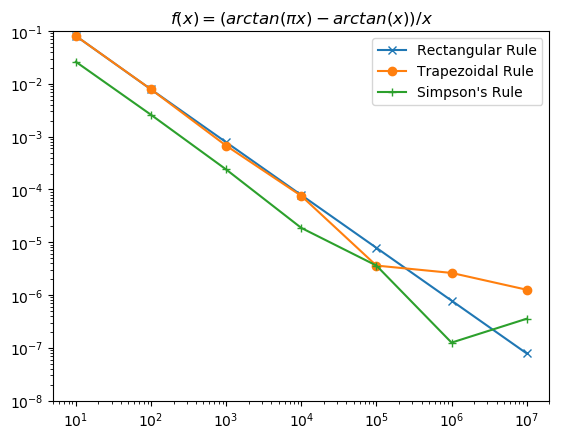

In [94]:
loglog([10^i for i in 1:7], errect4, "x-", label="Rectangular Rule")
loglog([10^i for i in 1:7], errtrap4, "o-", label="Trapezoidal Rule")
loglog([10^i for i in 1:7], errsimp4, "+-", label="Simpson's Rule")
ylim(10^-8, 10^-1)
legend()
title(L"f(x) = (arctan(\pi x) - arctan(x))/x");

Here simpson's or the trapezoidal rule do not approximate the integral better than the rectangular rule. Possible issues could be that the epsilon was too small so the second order or first-order approximations came too close to machine accuracy. On the other hand, increasing epsilon would make the integral too large and too inaccurate. 

### Problem 5

Suppose we have the following cubic 

$$ f(x) = dx^3 + cx^2 + bx + a $$

and we would like to integrate it over the interval $[-1,1]$. Then 

$$ \int_{-1}^{1} dx^3 + cx^2 + bx + a \, dx = \Big[ \frac{1}{4}dx^4 + \frac{1}{3}cx^3 + \frac{1}{2}bx^2 + ax \Big]^{1}_{-1} $$

$$ = \frac{1}{4}d + \frac{1}{3}c + \frac{1}{2}b + a - \frac{1}{4}d + \frac{1}{3}cx^3 - \frac{1}{2}b + a = \frac{2c}{3} + 2a $$

Now suppose our quadratic approximation is $mx^2 + nx + l$. Then setting the interpolation problem we get that 

$$ m + n + l = f(1) = a + b + c + d             $$
$$ l = f(0) = a                                       $$
$$ m - n + l = f(-1) = a - b + c - d                   $$

Adding equations (1) and (3) and substituting (2) we get that $m = c$ and $l = a$. Thus, 

$$ \int_{-1}^{1} f(x) \, dx = \frac{2c}{3} + a = \frac{2m}{3} + l = \frac{1}{3}\Big(f(-1) + 4f(0) + f(1)\Big)$$

This is exactly the formula for Simpson's rule, and from Problem 3 we have that if we can integrate exactly on $[-1,1]$, we can integrate exactly on $[a,b]$. Thus, Simpson's rule integrates cubics exactly. 